In [1]:
import sympy as sym
import sympy.plotting.plot as symplot
import matplotlib.pyplot as plt
import numpy as np


In [3]:
x = sym.symbols('x')
fx = 2*x**2
df = sym.diff(fx,x)
df

4*x

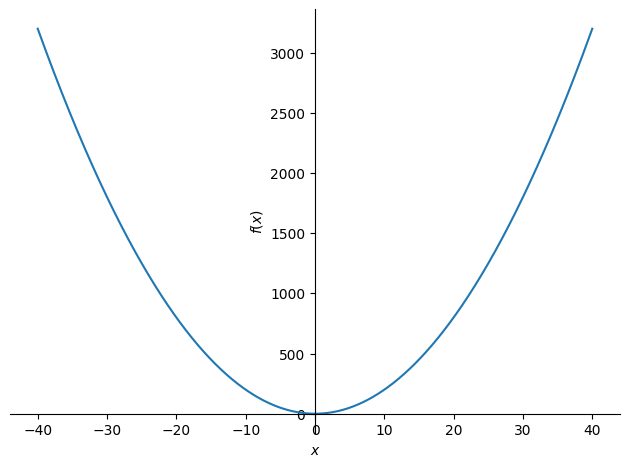

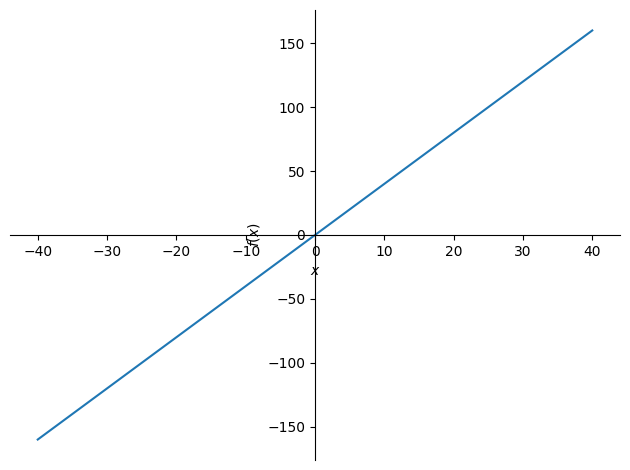

In [6]:
symplot(fx,(x,-40,40))
plt.show()

symplot(df,(x,-40,40))
plt.show()

In [33]:
 #gradiant descent

def fx(x):
    return 3*x**2 - 3*x + 4

def deriv(x):
    return 6*x-3


In [32]:
x = sym.symbols('x')
sfx = 3*x**2-3*x+4
dfx = sym.diff(fx)
fx.subs(x,3),dfx.subs(x,3)

(22, 15)

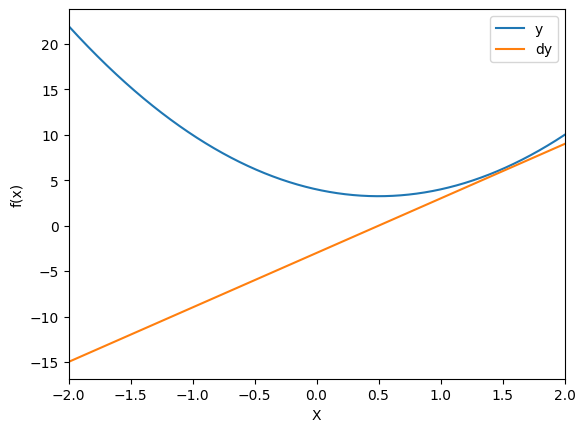

In [48]:
l = np.linspace(-2,2,2000)
plt.plot(l,fx(l))
plt.plot(l,deriv(l))
plt.xlim(l[[0,-1]])
plt.xlabel('X')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [66]:
local_min = np.random.choice(l,1)
lr = .01
epocs = 100
modelparams = np.zeros((epocs,2))


for i in range(epocs):
    gradient = deriv(local_min)
    local_min = local_min-lr*gradient
    modelparams[i,0] = local_min
    modelparams[i,1] = gradient

C:\Users\yashw\AppData\Local\Temp\ipykernel_15456\3764165598.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,0] = local_min
C:\Users\yashw\AppData\Local\Temp\ipykernel_15456\3764165598.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,1] = gradient


[-1.10155078]
updated lr 0.35
updated lr 0.175
9 [9.67242577e-05] [0.49999919]


C:\Users\yashw\AppData\Local\Temp\ipykernel_15456\2372588309.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,0] = local_min
C:\Users\yashw\AppData\Local\Temp\ipykernel_15456\2372588309.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,1] = gradient


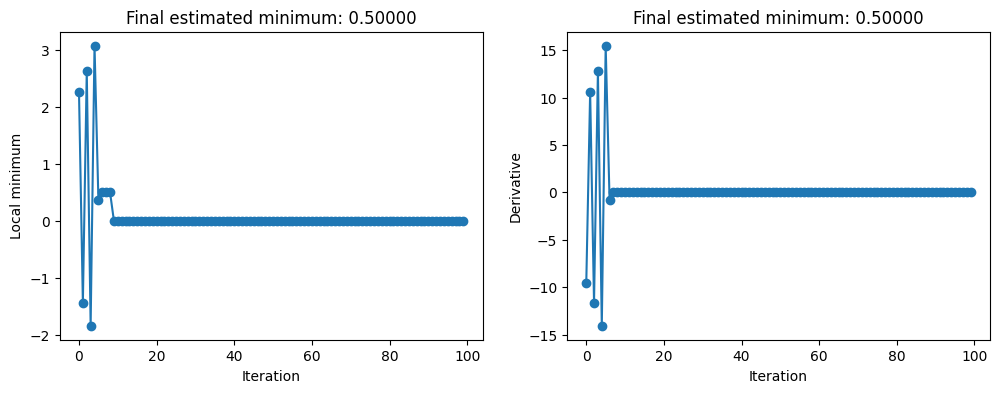

In [125]:
local_min = np.random.choice(l,1)
lr = 0.7
epocs = 100
modelparams = np.zeros((epocs,2))
print(local_min)
for i in range(epocs):
    if not(i%5):
       lr = lr/2
       print("updated lr",lr)
    gradient = deriv(local_min)
    local_min = local_min-lr*gradient
    if abs(gradient) <= 0.0001:
       print(i,gradient, local_min)
       break
    modelparams[i,0] = local_min
    modelparams[i,1] = gradient

# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {local_min[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

x**2 + cos(2*pi*x) = 2*x - 2*pi*sin(2*pi*x)


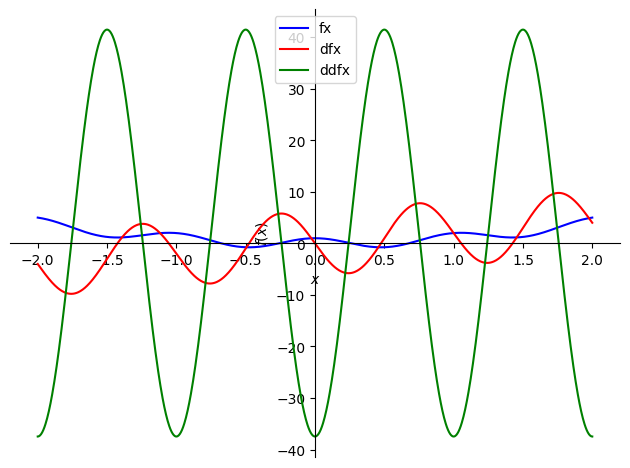

In [269]:
x = sym.symbols('x')
cos = sym.cos
sin = sym.sin
pi = sym.pi

fx = cos('2*pi*x')+x**2
dfx = sym.diff(fx)
ddfx = sym.diff(dfx)
print(fx,'=',dfx)

p = symplot(fx,(x,-2,2),label='fx',show=False,line_color='blue')
p.extend(symplot(dfx,(x,-2,2),label='dfx',show=False,line_color='red'))
p.extend(symplot(ddfx,(x,-2,2),label='ddfx',show=False,line_color='green'))
p.legend = True
p.show()

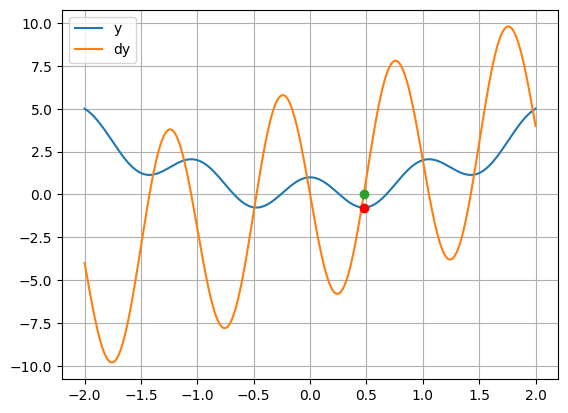

53 8.795007160555812e-05 [0.4758035]


In [32]:
from collections import deque
from IPython import display
import time
cos = np.cos
sin = np.sin
pi = np.pi

def fx_(x):
 return x**2 + cos(2*pi*x)

def dfx_(x):
  return 2*x - 2*pi*sin(2*pi*x)

lx = np.linspace(-2,2,20001)
local_min = np.array([lx[0]]) #np.array([0])#np.random.choice(lx,1)
epocs = 10000
lr = 0.1
final_ = np.zeros((epocs,2))

data_points = deque(maxlen=5) 
  
fig, ax = plt.subplots() 
line, = ax.plot([]) 

for i in range(epocs):
  if not(i%20) and i:
      lr = lr/(i/10)
  gradient = dfx_(local_min[0])
  local_min = local_min- lr*gradient
  final_[i,0] = local_min 
  final_[i,1] = gradient

  plt.plot(lx,fx_(lx),lx,dfx_(lx))
  plt.grid()
  plt.legend(['y','dy'])

  plt.plot(local_min,fx_(local_min),'ro')
  plt.plot(local_min,dfx_(local_min),'o')
  # plt.plot(final_[:i,0],final_[:i,1])
  display.clear_output(wait=True)
  plt.show()
  # time.sleep(0.001)
  if abs(gradient) <= 0.0001:
    print(i,gradient, local_min)
    break

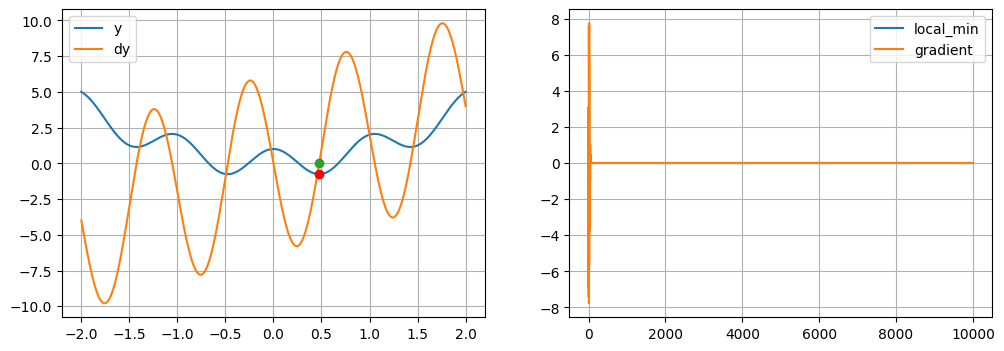

In [33]:
from collections import deque

fxg  = deque(final_[:,0])
dfxg  = deque(final_[:,1])

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(lx,fx_(lx),lx,dfx_(lx))
ax[0].grid()
ax[0].legend(['y','dy'])
ax[0].plot(local_min,fx_(local_min),'ro')
ax[0].plot(local_min,dfx_(local_min),'o')
ax[1].plot(fxg)
ax[1].plot(dfxg)
# ax[1].pause(0.01) 
ax[1].grid()
ax[1].legend(['local_min','gradient'])
plt.show()